# Height-Weight Relation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('E:/datasets/height-weight/Height_Weight.csv')

In [21]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [23]:
print(df.Gender.nunique())
print(df.Gender.unique())

2
['Male' 'Female']


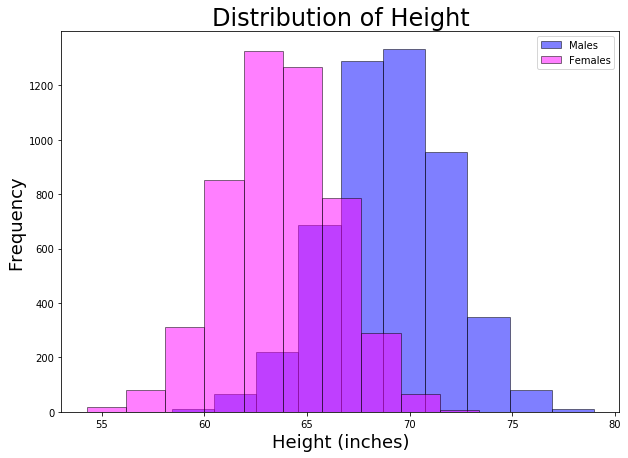

In [24]:

# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

In [25]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


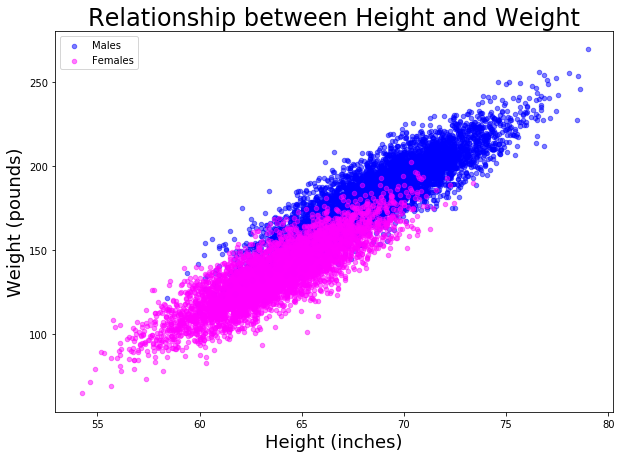

In [26]:

# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

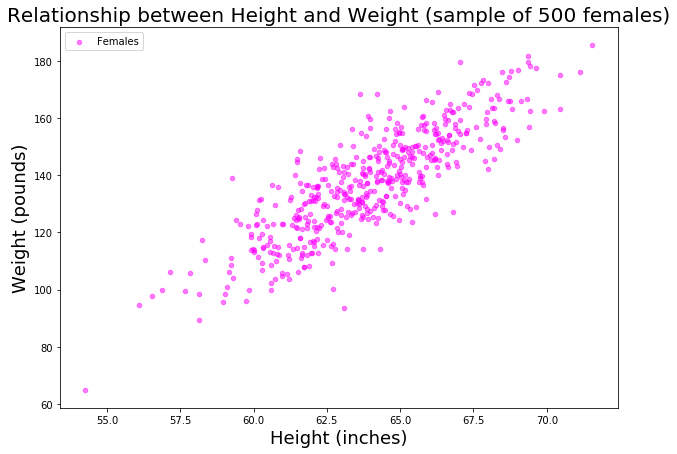

In [27]:

# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

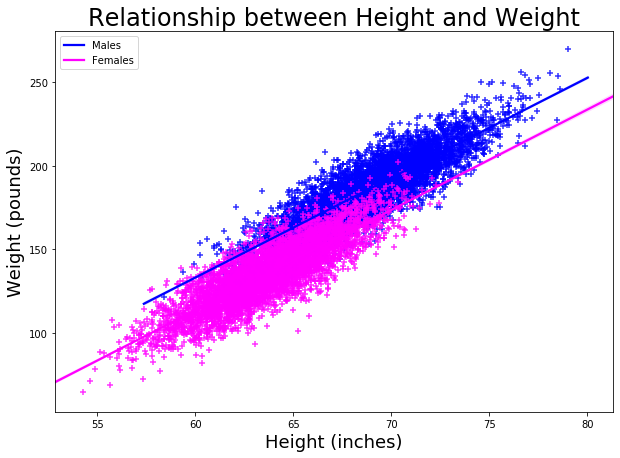

In [28]:
import seaborn as sns
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
#encoder=LabelEncoder()
#df['Gender'] = encoder.fit_transform(df['Gender'])

In [31]:
#df[df['Gender'] == 'Male']

In [48]:
from sklearn.preprocessing import StandardScaler
std1=StandardScaler()
std2=StandardScaler()
y1=df[df['Gender'] == 'Male'].Weight.values.reshape(-1, 1)
#y1=std1.fit_transform(y1)
x1=df[df['Gender'] == 'Male'].Height.values.reshape(-1, 1)
#x1=std2.fit_transform(x1)
y2=df[df['Gender'] == 'Female'].Weight.values.reshape(-1, 1)
x2=df[df['Gender'] == 'Female'].Height.values.reshape(-1, 1)

In [49]:
y1

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [199.19540008],
       [185.90590949],
       [198.90301194]])

In [50]:
x1

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [67.01379497],
       [71.55771849],
       [70.35187988]])

In [51]:
y2

array([[102.08832637],
       [141.3058226 ],
       [131.04140269],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [52]:
x2

array([[58.91073204],
       [65.23001251],
       [63.36900376],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [54]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x1, y1)
reg2 = LinearRegression()
reg2.fit(x2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
reg1.coef_, reg1.intercept_, reg2.coef_, reg2.intercept_

AttributeError: 'numpy.ndarray' object has no attribute 'tofloat'

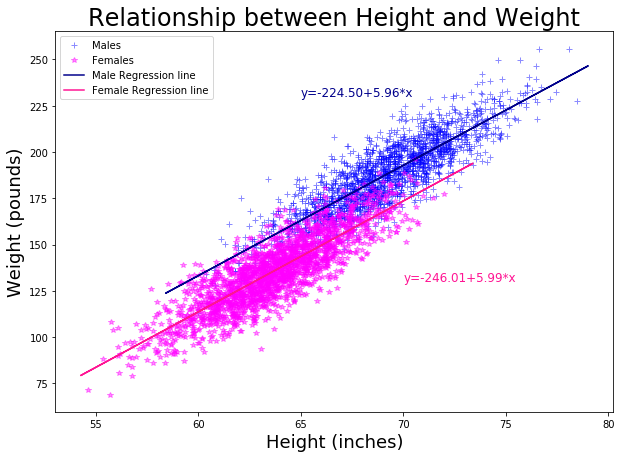

In [88]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x1[:2000], y1[:2000], '+', color='blue', alpha=0.45)
ax.plot(x2[:2000], y2[:2000], '*', color='magenta', alpha=0.45)
ax.plot(x1, reg1.predict(x1),'-', color='darkblue')
ax.plot(x2, reg2.predict(x2),'-', color='deeppink')
plt.legend(labels=['Males', 'Females', 'Male Regression line', 'Female Regression line'])
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(float(reg1.intercept_), float(reg1.coef_)), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(float(reg2.intercept_), float(reg2.coef_)), color='deeppink', size=12)
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [57]:
import numpy as np
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

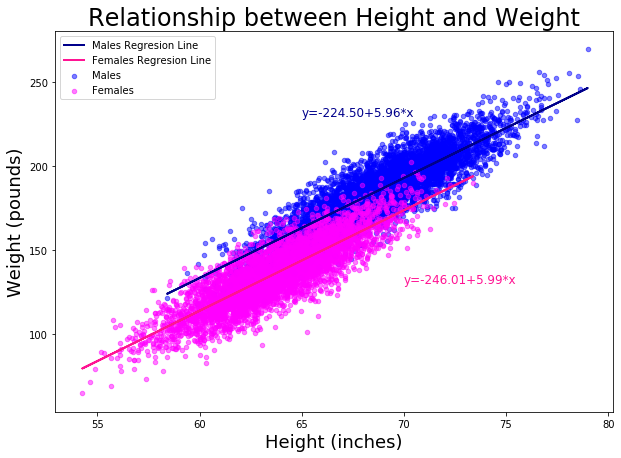

In [58]:
# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);